In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

columns = ['Class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
           'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
           'Proanthocyanins', 'Color intensity', 'Hue',
           '0D280_0D315_of_diluted_wines', 'Proline']
## Load the training set
data = pd.read_csv('wine/wine.data',  names=columns)


In [36]:
X = data.drop(columns=['Class']).values
Y = data['Class'].values
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)
confusion_matrix = [[0, 0, 0] for i in range(3)]
def squared_dist(x,y):
        return np.sum(np.square(x-y))
predictions = []

for i in range(len(X)):
    x_train = np.delete(X, i, axis = 0)
    y_train = np.delete(Y, i, axis = 0)
    x_actual = X[i, :]
    y_actual = Y[i]
    distances = [squared_dist(x_actual, x) for x in x_train]
    nn_index =  np.argmin(distances)
    y_pred = y_train[nn_index]

    predictions.append(y_pred)
    confusion_matrix[y_actual - 1][y_pred - 1] += 1
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)
acc = 0
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        if i == j:
            acc += confusion_matrix[i][j]
print("Accuracy:")
print(acc / len(X))    

Confusion Matrix:
[52, 3, 4]
[5, 54, 12]
[3, 14, 31]
Accuracy:
0.7696629213483146


k values for cross-validation: [  2   7  12  17  22  27  32  38  43  48  53  58  63  69  74  79  84  89
  94 100]


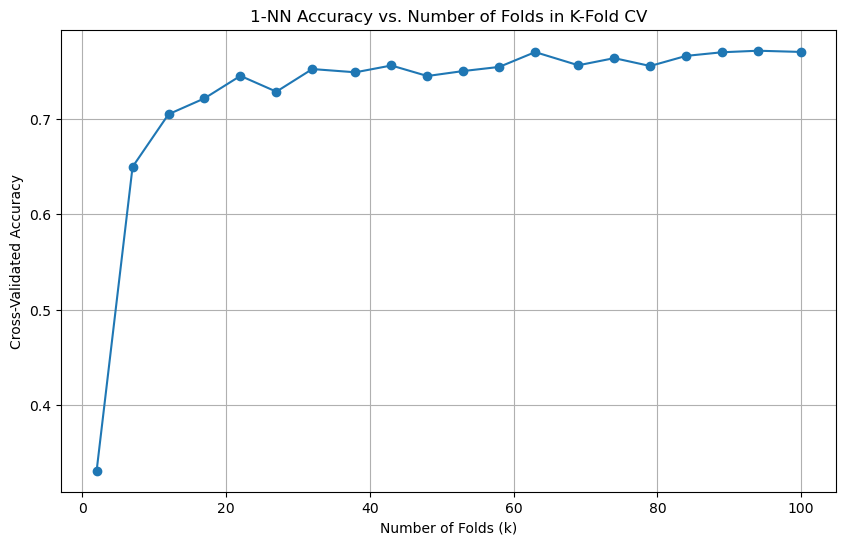

accuracies:
[0.3314606741573034, 0.6496703296703298, 0.7047619047619046, 0.7213903743315508, 0.7449494949494949, 0.7283950617283951, 0.7520833333333334, 0.7486842105263157, 0.7558139534883721, 0.7447916666666666, 0.75, 0.7543103448275862, 0.7698412698412699, 0.7560386473429951, 0.7635135135135135, 0.7552742616033755, 0.7658730158730158, 0.7696629213483146, 0.7712765957446809, 0.77]


In [33]:

# We are choosing 20 different values of k that ranges from 2~100
k = np.linspace(2, 100, 20, dtype=int)
# I think we need to remove unique ones
k = np.unique(k)
print(f"k values for cross-validation: {k}")

X = data.drop(columns=['Class']).values
Y = data['Class'].values
knn = KNeighborsClassifier(n_neighbors=1)
accuracies = []

for i in k:
    #split the dataset into i about of equal parts
    # shuffle means we shuffle, random means we randomly shuffle
    # we dont shuffle bc TA/Prof said so?
    kfold = KFold(n_splits=i, shuffle=False)
    # Trains the 1nn classifier using the features X and labels(1,2,3) Y
    # uses kfold object to determine how to split
    #  returns a list of accuracy values, one for each fold
    scores = cross_val_score(knn, X, Y, cv=kfold)
    # mean accuary
    temp = scores.mean()
    accuracies.append(temp)
    
plt.figure(figsize=(10, 6))
plt.plot(k, accuracies, marker='o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('1-NN Accuracy vs. Number of Folds in K-Fold CV')
plt.grid(True)
plt.show()
print("accuracies:")
print(accuracies)


In [34]:
data

,Class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
train_data, test_data, train_labels, test_labels = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
confusion_matrix = [[0, 0, 0] for i in range(3)]
def squared_dist(x,y):
        return np.sum(np.square(x-y))
predictions = []

for i in range(len(X_normalized)):
    x_train = np.delete(X_normalized, i, axis = 0)
    y_train = np.delete(Y, i, axis = 0)
    x_actual = X_normalized[i, :]
    y_actual = Y[i]
    distances = [squared_dist(x_actual, x) for x in x_train]
    nn_index =  np.argmin(distances)
    y_pred = y_train[nn_index]

    predictions.append(y_pred)
    confusion_matrix[y_actual - 1][y_pred - 1] += 1
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)
acc = 0
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        if i == j:
            acc += confusion_matrix[i][j]
print("accuracy:")
print(acc / len(X_normalized))   

Confusion Matrix:
[59, 0, 0]
[5, 62, 4]
[0, 0, 48]
accuracy:
0.949438202247191
